# Customer Analytic Project

The project focuses on cohort analysis, revenue trends, RFM (Recency, Frequency, Monetary) analysis, and the implementation of machine learning models to predict customer behavior.

## Results of the Analysis

### Cohort Analysis
- Identified a high-retention December 2010 cohort.
- Observed return behavior in November, followed by a significant drop in activity.

### Revenue Analysis
- December showcased exceptional revenue and retention.
- May cohort recorded over 100% revenue growth in December.
- Highest revenue in December 2010, with a subsequent decline post-May.

### Top 5 Recommendations:
1. **Learn from December 2010:**
   - Replicate successful strategies from December 2010 to boost retention and revenue.
2. **Analyze August Cohort:**
   - Investigate why the August cohort retains well; apply insights for overall retention.
3. **Uncover May Cohort's Secrets:**
   - Explore factors behind exceptional revenue in the May cohort for replication.
4. **Targeted December 2010 Tactics:**
   - Implement strategies similar to those that worked in December 2010.
5. **Crack the August Code:**
   - Investigate and implement factors contributing to notable retention in August.



### RFM Analysis
- Favorable average frequency of 91 purchases with a 4-day recurrence.
- Segments customers based on their monetary and recency ranges.
- Average spend is $674.


### Machine Learning Model
- Regression Model predicting customer spending in the next 90 days (R-squared of 75%).
- Classification Model predicting the probability of a purchase in the next 90 days (AUC of 98%).

### Model Applications:
- Identify missed opportunities for recent customer spending.
- Recognize customers with the highest probability of buying in the next 90 days.
- Identify customers expected to make a purchase but did not.
- Recognize customers who recently purchased but are unlikely to buy again.


In [1]:
# imoprt libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.shape

(541909, 8)

In [6]:
# Check for null vlaues 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

we have 135,080 customer without id, and we are only interested with the customer we have so i will drop the any entity that have a value null value in the customer id column

In [7]:
df.dropna(subset= 'CustomerID', inplace= True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.shape

(406829, 8)

The InvoiceNo number uniquely assigned to each transaction. If it starts with letter 'C', it indicates a cancellation

In [9]:
df[df['InvoiceNo'].str.contains('C','c')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [10]:
df[df['InvoiceNo'].str.contains('C','c')].shape

(8905, 8)

So there is 8,905 transactions canceled , i will drop them out

In [11]:
# drop canceled orders
df = df.drop(df[df['InvoiceNo'].str.contains('C')].index)

Can also see some columns have wrong data types so i will correct them

In [12]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
df[['InvoiceNo','CustomerID']] = df[['InvoiceNo','CustomerID']].astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


and lastly i will create a value column for the amount of money the customer spend for each transaction

In [16]:
# creating Value column
df['Value'] = df['Quantity'] * df['UnitPrice']

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


That was all the data wrangling for this data now will start the analysis, before i got into depth analysis i want to see how the country can affect the business 


In [592]:
df['Country'].nunique()

37

We have 37 country in this data set i will see the top 5 country in terms of revenue and number of customers

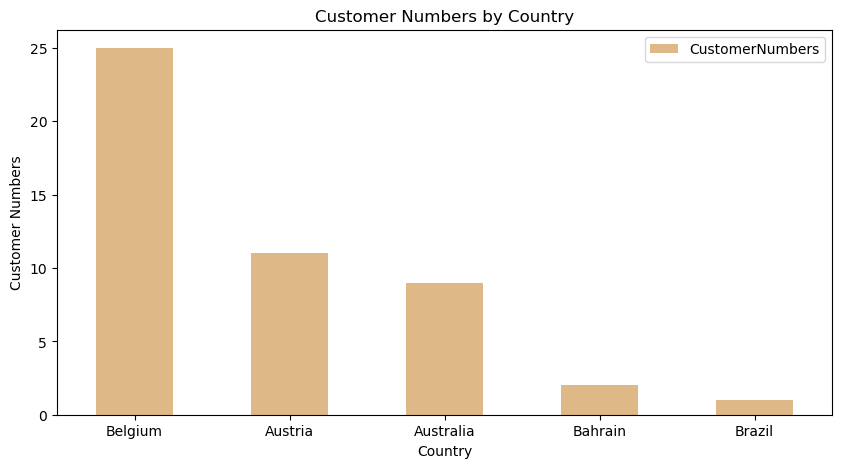

In [644]:
df.groupby('Country').agg({'CustomerID': pd.Series.nunique})[0:5].sort_values('CustomerID', ascending= False)\
.set_axis(['CustomerNumbers'], axis = 1).plot(kind = 'bar', color = 'burlywood', figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Customer Numbers')
plt.title('Customer Numbers by Country')
plt.xticks(rotation = 0)
plt.show()

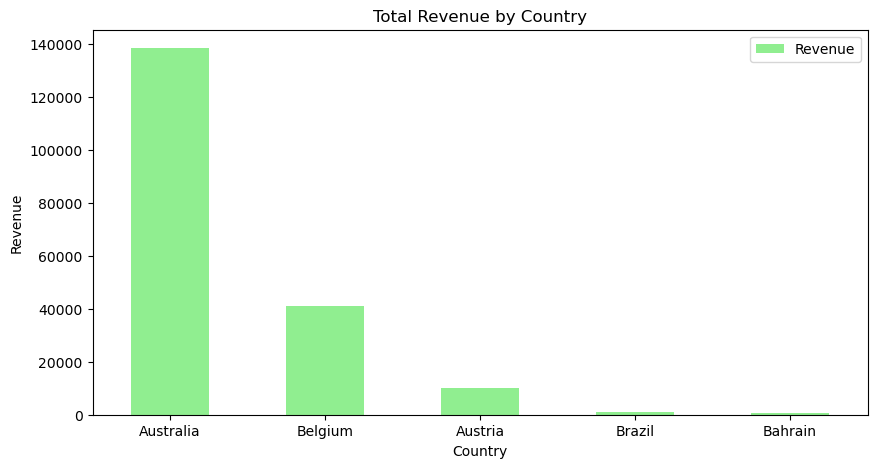

In [645]:
df.groupby('Country').agg({'Value': sum})[0:5].sort_values('Value', ascending= False)\
.set_axis(["Revenue"], axis = 1).plot(kind = 'bar', color = 'lightgreen', figsize = (10,5))
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation = 0)
plt.show()

We can notice Belgium have highest number of customer but Australia making the greatest revenue
so the firm can 
   - Encouraging people to buy in Belgium
   - Making marketing campaign to gain more customers in Australia
   - See what marketing strategy for these country and apply it on other country

# Cohort Analysis

In [18]:
# creating monthly based invoice date for the cohort analysis
df['InvoiceMonth'] = df['InvoiceDate'].apply(lambda x : x.strftime('%Y-%m'))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [19]:
cohor_df = df[['CustomerID', 'InvoiceMonth']]\
    .sort_values('InvoiceMonth')\
    .groupby(['CustomerID']).first()

In [20]:
cohor_df.columns = ['CohortDate']
cohor_df.head()

,CohortDate
CustomerID,
12346,2011-01
12347,2010-12
12348,2010-12
12349,2011-11
12350,2011-02


In [21]:
print("Min Date: ",cohor_df['CohortDate'].min()\
      ,"\nMax Date: ",cohor_df['CohortDate'].max())

Min Date:  2010-12 
Max Date:  2011-12


Creating Cohort month to specify the first time we acquire the customer

In [25]:
# Cohort month
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Value,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010-12


now creating cohort index, for not making the dataframe wider i will create a function to get the month and year (since the date ranges from 2010 to 2011) to get the index

In [26]:
# Creating function to get the month and the year
def dates_values(df,col):
    month = pd.to_datetime(df[col]).dt.month
    year = pd.to_datetime(df[col]).dt.year
    return month, year

In [27]:
InvoiceMonth, InvoiceYear = dates_values(df,'InvoiceMonth')
CohortMonth, CohortYear = dates_values(df, 'CohortMonth')

In [28]:
# create cohor index
mnth_diff = InvoiceMonth - CohortMonth
yr_diff = InvoiceYear - CohortYear
df['CohortIndex'] = yr_diff*12+mnth_diff+1  # the 1 included is optional just incase we get value of zero

In [29]:
cohort_table = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()  

In [30]:
cohort_pivot = cohort_table.pivot(index= 'CohortMonth', columns= 'CohortIndex', values= 'CustomerID')
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


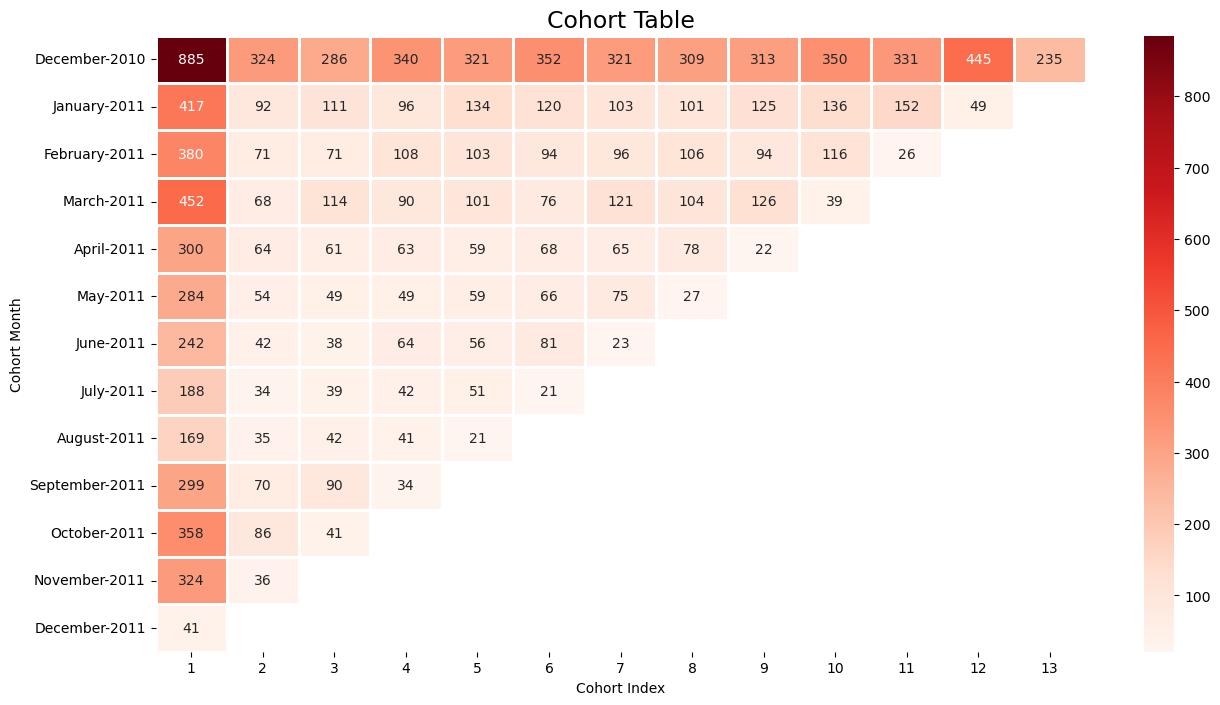

In [31]:
# plotting the cohort data

plt.figure(figsize= (15,8))
cohort_pivot.index = pd.to_datetime(cohort_pivot.index).strftime('%B-%Y')
sns.heatmap(cohort_pivot, cmap= 'Reds', cbar = True, annot = True, fmt= '.0f', linewidths=1, linecolor='white')
plt.title('Cohort Table', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [32]:
# making Customer retention table
cohort_perc = cohort_pivot.div(cohort_pivot.iloc[:,0], axis = 0)

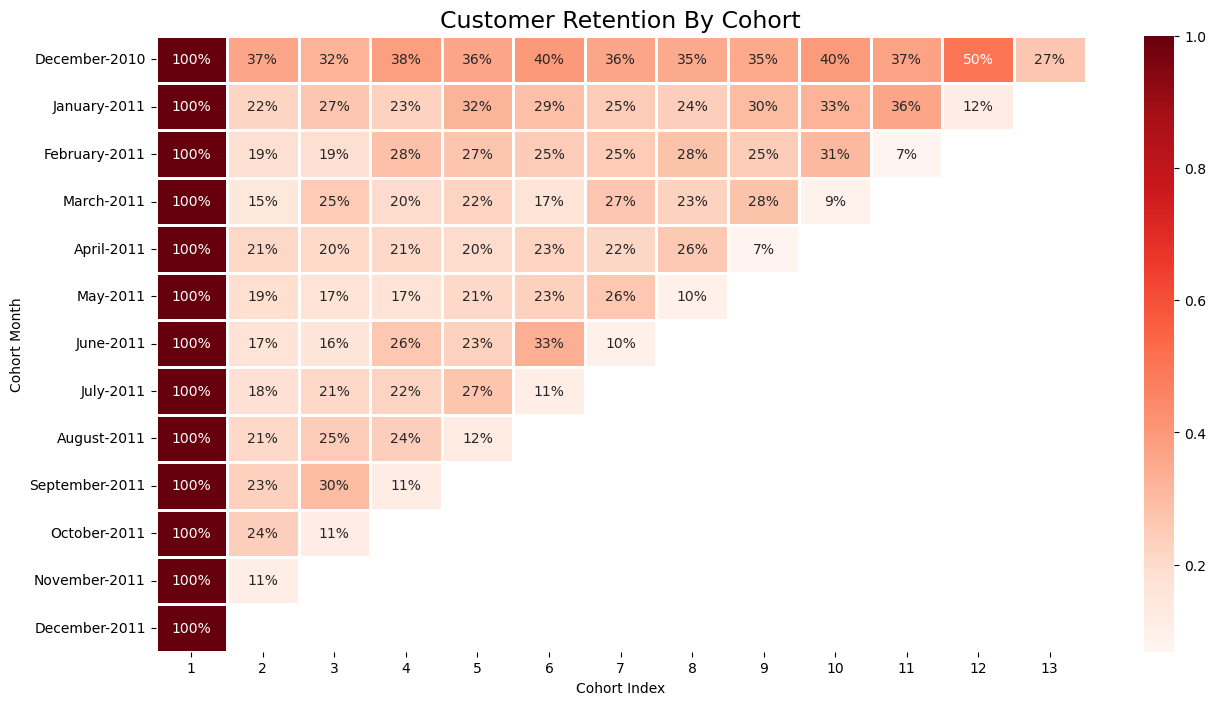

In [33]:
plt.figure(figsize= (15,8))
sns.heatmap(cohort_perc, cmap= 'Reds', cbar = True, annot = True,fmt= '.0%', linewidths=1, linecolor='white')
plt.title('Customer Retention By Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

### Insights

1. **High Retention in December 2010 Cohort:**
   - The December 2010 cohort have higher customer retention compared to other cohorts. as well as this cohort maintained approximately 50% of its initial customers until November.
   - Leverage the high retention observed in December 2010 cohort by implementing targeted strategies 

2. **Customer Return Behavior in November:**
   - An interesting pattern where customers tend to return and make purchases during November. However, there is a substantial drop in activity immediately after this month.
   - This drop could be due to lack of data after 09/12/2011
   - investigate the factors contributing to the significant drop in customer activity after November
  


###  Revenue by Cohort

In [34]:
cohort_revenue = df[['CohortMonth', 'CohortIndex' ,'Value']].groupby(['CohortMonth','CohortIndex' ])\
.agg({'Value':'sum'}).reset_index()

In [36]:
cohort_revenue = cohort_revenue.pivot(index = 'CohortMonth', columns= 'CohortIndex', values = 'Value')

cohort_revenue

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,572713.890,276237.69,233845.37,303119.39,204407.66,336627.50,314162.61,310783.92,331749.220,472813.64,456080.61,513803.59,185803.13
2011-01,293207.350,55149.91,63268.17,71587.40,81114.09,84583.78,70107.40,72689.71,72023.651,111803.90,123882.10,26464.82,NaN
2011-02,158142.070,29043.24,41134.38,48238.86,40147.91,34223.23,49706.63,62450.83,55380.060,64809.45,10600.22,NaN,NaN
2011-03,200069.960,30059.43,59057.51,42816.61,51657.33,40020.81,64919.49,71023.95,71265.830,12868.02,NaN,NaN,NaN
2011-04,122011.491,29452.82,25077.07,24311.47,26314.19,30206.30,28668.98,34228.61,6350.100,NaN,NaN,NaN,NaN
2011-05,124103.780,18682.76,20193.76,19162.17,27861.87,32976.60,33312.91,179251.53,NaN,NaN,NaN,NaN,NaN
2011-06,135742.950,14805.15,14155.40,30961.59,26754.54,42808.25,8227.35,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,74008.751,11789.67,15534.18,17551.47,19512.11,6072.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79756.100,20962.93,35503.90,44541.76,15284.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


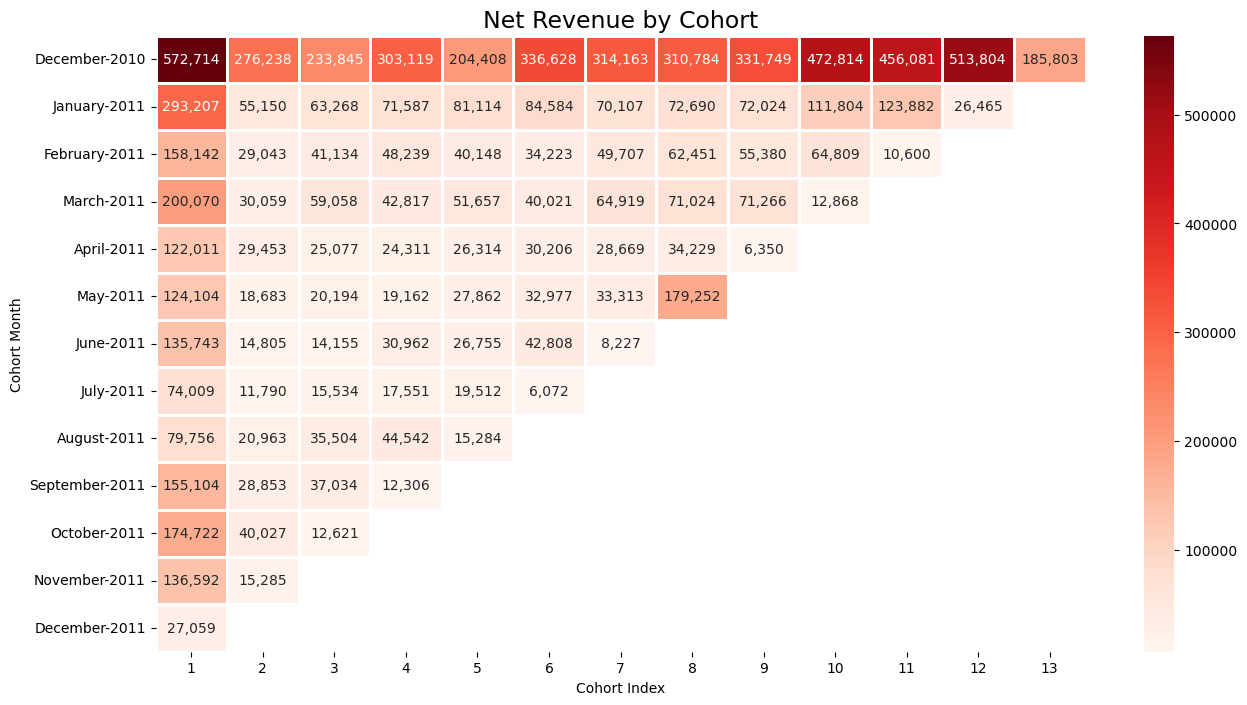

In [37]:
plt.figure(figsize=(15,8))
cohort_revenue.index = pd.to_datetime(cohort_revenue.index).strftime('%B-%Y')
sns.heatmap(cohort_revenue, cmap= 'Reds', annot= True, fmt= '0,.0f', linewidths= 1 , linecolor= 'white')
plt.title('Net Revenue by Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

In [38]:
# Net revenue retention 
cohort_revenue_ret = cohort_revenue.div(cohort_revenue.iloc[:,0], axis = 0)

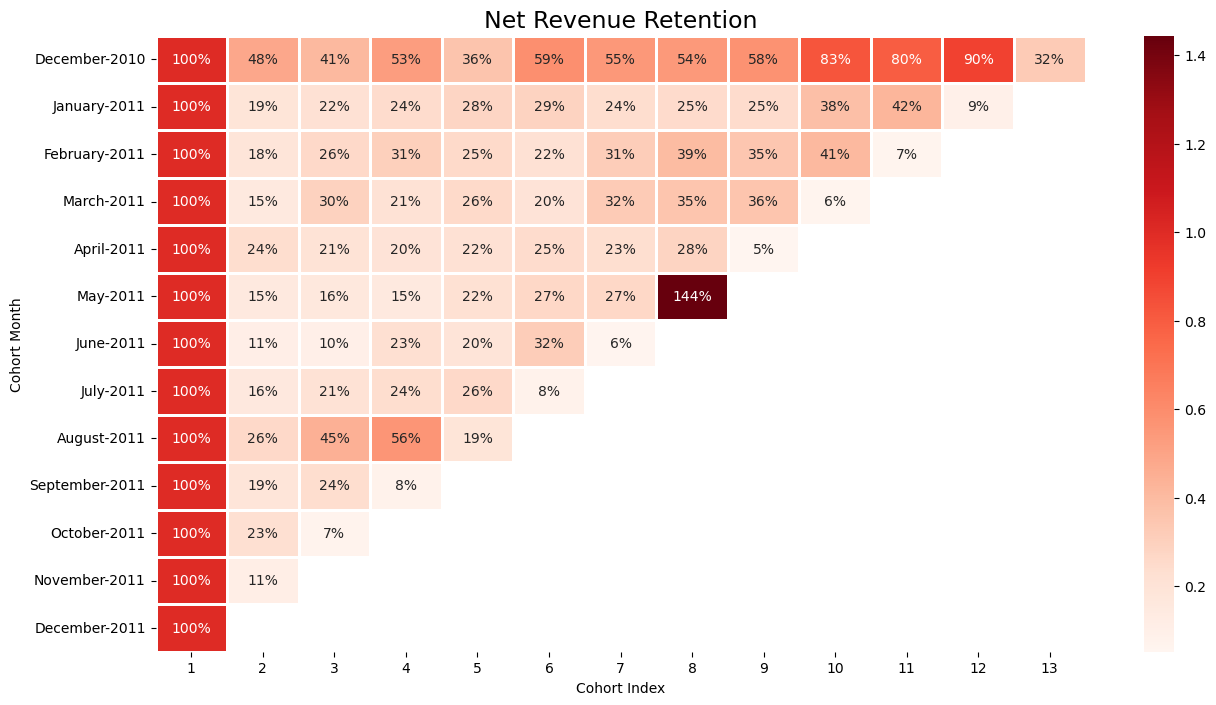

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(cohort_revenue_ret, cmap= 'Reds', annot= True, fmt= '0.0%', linewidths= 1 , linecolor= 'white')
plt.title('Net Revenue Retention', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

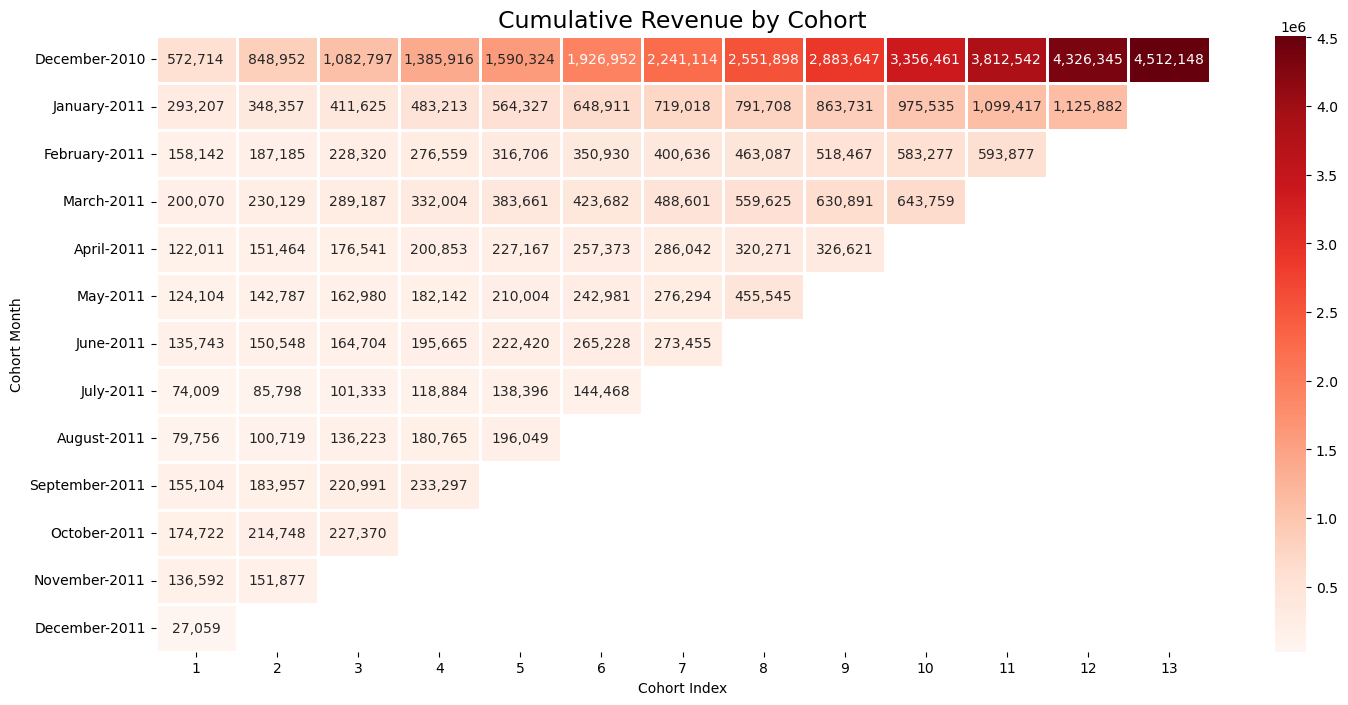

In [40]:
# creating cumulative revenue by cohort
cohort_revenue_cumulative = cohort_revenue.cumsum(axis=1)
plt.figure(figsize=(17,8))
sns.heatmap(cohort_revenue_cumulative, cmap= 'Reds', annot= True,fmt="0,.0f", linewidths= 1 , linecolor= 'white')
plt.title('Cumulative Revenue by Cohort', fontsize = 17)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

### Insights

- December have exceptional revenue with impressive retention.
- The May cohort recorded revenue growth surpassing 100% during December.
- The August cohort displayed significant retention in both November and October.
- The highest revenue was observed in December 2010, 
- January have highest revenue for the cohorts in the year 2011. 
- Cohorts revenue stable from February to May,however a decline in revenue occurred for cohorts after May suggesting a noteworthy shift.

#### Recommendations

- Implement strategies similar that is been used to those successful in December 2010.
- Examine the behavior of the August cohort to understand the factors contributing to its notable retention.
- Investigate the purchasing behavior of the May cohort to identify motivations leading to exceptional 100%+ revenue retention.
- Given the substantial revenue observed in January, consider targeting cohorts from that period for further study. Investigate the dynamics that led to their success and explore reasons behind the subsequent cumulative revenue drop observed in cohorts after May.

# RFM Analysis and Segmentation

In [234]:
# the most recent date in the data set 
r = df['InvoiceDate'].max()
r.strftime('%Y-%m-%d')

'2011-12-09'

In [585]:
# creating rfm table
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda date: (r - date.max()).days,
                              'InvoiceNo': pd.Series.nunique,
                              'Value': 'sum'
                             })
rfm.columns = ['Recency', 'Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,18,1,1757.55
12350,310,1,334.40


In [586]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0,92.041484,100.007757,0.0,17.000,50.00,141.50,373.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


In [44]:
hist, bin_edges = np.histogram(rfm['Monetary'], bins= 50)

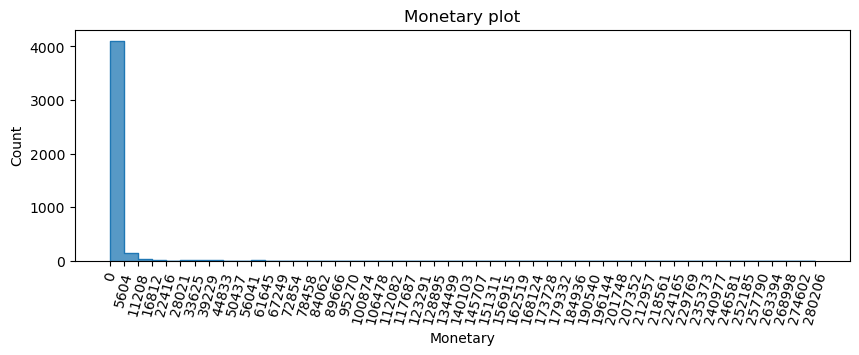

In [500]:
plt.figure(figsize=(10,3))
sns.histplot(x = 'Monetary', data = rfm, bins= 50 , element= 'step')
plt.title('Monetary plot')
plt.xticks(bin_edges, rotation = 75)
plt.show()

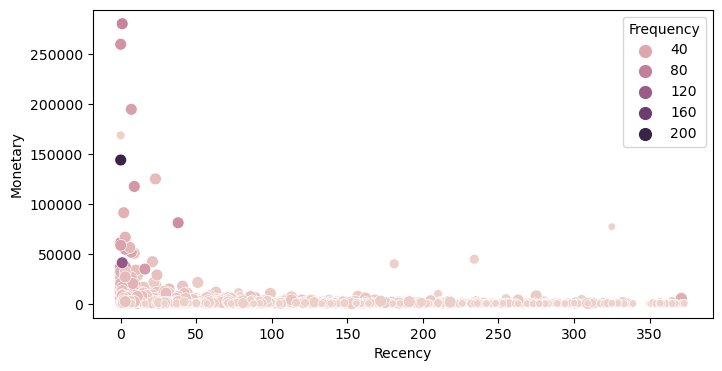

In [197]:
plt.figure(figsize=(8,4))
sns.scatterplot(data = rfm, x = 'Recency', y ='Monetary', size= 'Frequency',size_norm=(0,5), hue= "Frequency")
plt.show()

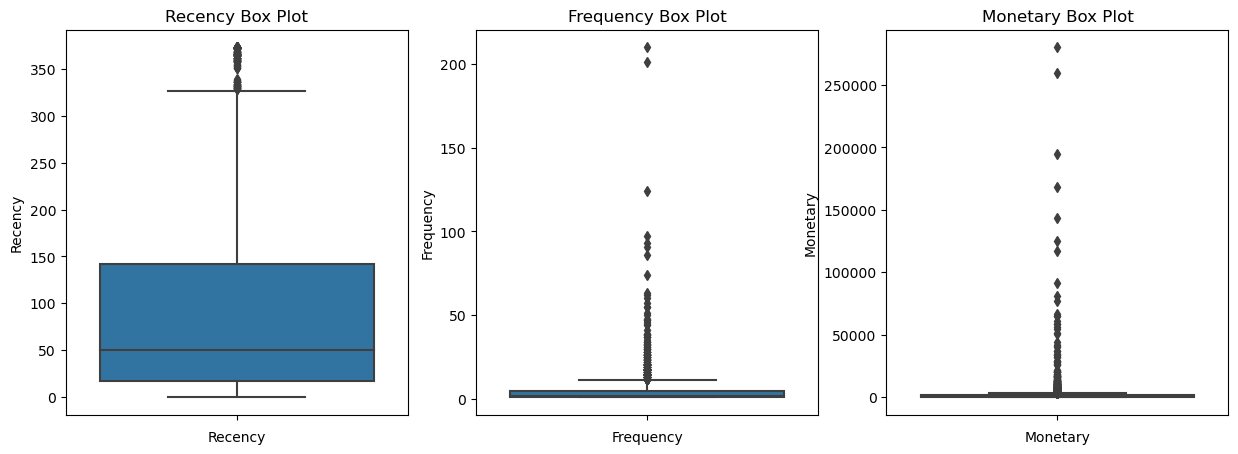

In [506]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(data= rfm,y = rfm['Recency'], ax= ax[0])
sns.boxplot(data= rfm,y = rfm['Frequency'], ax= ax[1])
sns.boxplot(data= rfm,y = rfm['Monetary'], ax= ax[2])
ax[0].set_title('Recency Box Plot')
ax[0].set_xlabel('Recency')
ax[1].set_title('Frequency Box Plot')
ax[1].set_xlabel('Frequency')
ax[2].set_title('Monetary Box Plot')
ax[2].set_xlabel('Monetary')
plt.show()

### Insights

The majority of customers fall within the monetary range of (0 to 5,600) and recency of (0 to 50), however on average our customers spend 674$. Given the skewed nature of the monetary data using the median for the monetary variable would be more appropriate. Additionally we observe an average frequency of 91 purchases with a recurrence of 4 days overall favorable values.

In [587]:
# Give scores for Frequency, Recency and Monetary
from scipy.stats import percentileofscore
rfm['RecencyScore'] = rfm['Recency'].apply(lambda x: 10 - percentileofscore(rfm['Recency'], x)/10).round().astype(int)
rfm['FrequencyScore'] = rfm['Frequency'].apply(lambda x: percentileofscore(rfm['Frequency'], x)/10).round().astype(int)
rfm['MonetaryScore'] = rfm['Monetary'].apply(lambda x: percentileofscore(rfm['Monetary'], x)/10).round().astype(int)

In [588]:
# RFM score adding more weight to recency and frequency 
rfm['RFMScore'] = (rfm['FrequencyScore']*0.5+ rfm['RecencyScore']*0.3 +rfm["MonetaryScore"]*0.2).round().astype(int)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
13884,7,5,787.60,9,8,6,8
12346,325,1,77183.60,0,2,10,3
13359,63,1,439.56,4,2,4,3
12509,284,1,176.50,1,2,1,2
12837,173,1,134.10,2,2,1,2
14264,154,2,333.97,2,4,3,3
15105,18,7,2298.93,7,9,8,8
14569,1,1,227.39,10,2,2,4
15673,88,4,2881.02,3,7,9,6


#### Segmenting customers Based on RFM
Now we can segment customers according to their RFM scores, with additional emphasis on recency and frequency. These segments are flexible and can be adjusted based on business perspectives and needs.

In [867]:

rfm['RFMSegment'] = np.select(
    [
        (rfm['RFMScore'] >= 8),
        ((6 <= rfm['RFMScore']) & (rfm['RFMScore'] < 8)),
        ((4 <= rfm['RFMScore']) & (rfm['RFMScore'] < 6)),
        ((2 <= rfm['RFMScore']) & (rfm['RFMScore'] < 4)),
        (rfm['RFMScore'] < 2)
    ],
    [
        "Champions", 
        "Loyal Customers", 
        "Potential Loyalists", 
        "New Customers", 
        "Lost Customers"
    ]
)
rfm.sample(10)

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,RFMSegment
CustomerID,,,,,,,,
15279,354,1,290.51,0,2,2,1,Lost Customers
13492,136,3,1269.84,3,6,7,5,Potential Loyalists
12974,197,1,144.80,2,2,1,2,New Customers
15067,78,3,1744.76,4,6,8,6,Loyal Customers
16148,296,1,76.32,1,2,0,1,Lost Customers
17272,42,4,2148.63,5,7,8,7,Loyal Customers
14460,110,3,434.34,3,6,4,5,Potential Loyalists
13971,18,8,2758.26,7,9,9,8,Champions
15739,66,1,449.12,4,2,4,3,New Customers


In [853]:
rfm.groupby('RFMSegment')[['Recency','Frequency','Monetary']].agg(['mean','count']).round(2)

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
RFMSegment                                                      
Champions             13.86   920     11.95   920  6533.17   920
Lost Customers       327.88   171      1.00   171   145.75   171
Loyal Customers       45.67   919      4.06   919  1715.32   919
New Customers        162.41  1284      1.13  1284   398.08  1284
Potential Loyalists   76.60  1045      2.09  1045   754.50  1045

# Machine Learning 
Building a machine learning model based on the RFM features to:  
- Predicting how much the customer will spend in the next 90 days (Regression Model)  
- What will be the probability a customer will make purchase in the next 90 days (Classification Model)
- See how these factors impact the customer decision

Since we are dealing with time element which is making prediction for the 90 days we have to create a time split or temporal split such that we end up having data before 90 days of our most recent date to build a model able to predict 90 days in the ahead 

In [55]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [57]:
# finding the most recent date
max_date = df['InvoiceDate'].max()
max_date.strftime('%Y-%m-%d')

'2011-12-09'

In [58]:
# the cutting date to split the data
cutt = max_date - pd.to_timedelta(90, unit= 'd')
cutt.strftime('%Y-%m-%d')

'2011-09-10'

In [59]:
df_before = df[df['InvoiceDate'] <= cutt]
df_after = df[df['InvoiceDate'] > cutt]

In [60]:
# creating the features to use in the models using the data of the last 90 days 

# evaluate the total amount spen in the last 90 day 
spend_df = df_after.groupby('CustomerID').agg({'Value': sum}).set_axis(['Spend90D'], axis = 1)
# Assigin a value of 1 for each customer who but in the last 90 days
spend_df['Buy90D'] = 1 

In [61]:
spend_df.head()

,Spend90D,Buy90D
CustomerID,,
12347,1519.14,1
12348,310.00,1
12349,1757.55,1
12352,944.23,1
12356,58.35,1


We've obtained the RFM values from the 'rfm' table. Now, we merge both dataframes to prepare the table for machine learning.

In [367]:
# using Join to combine the two dataframe for one single dataframe 
clv_df = rfm[["Recency","Frequency","Monetary"]].join(spend_df, how= 'left').fillna(0)
clv_df.head()

,Recency,Frequency,Monetary,Spend90D,Buy90D
CustomerID,,,,,
12346,325,1,77183.60,0.00,0.0
12347,2,7,4310.00,1519.14,1.0
12348,75,4,1797.24,310.00,1.0
12349,18,1,1757.55,1757.55,1.0
12350,310,1,334.40,0.00,0.0


Now that all the features are prepared, it's time to build the two models as outlined earlier:
1. Regression model for forecasting the total expenditure of a customer in the next 90 days.
2. Classification model to estimate the likelihood of a customer making a purchase within the next 90 days.  

but before developing the models let's handle the outliers since can impact the model accuracy

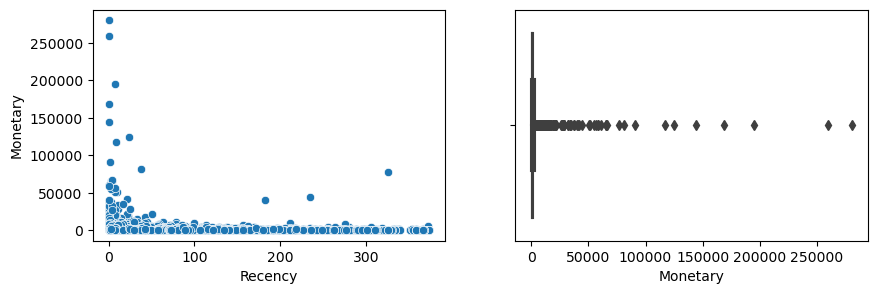

In [376]:
# Visualizing the outliers in monetary data
fig, ax = plt.subplots(1,2,figsize = (10,3))
sns.scatterplot(data = clv_df, y = clv_df['Monetary'], x= clv_df['Recency'], ax= ax[0])
sns.boxplot(data= clv_df, x = clv_df['Monetary'], ax= ax[1])
plt.show()

In [369]:
clv_df.corr()

,Recency,Frequency,Monetary,Spend90D,Buy90D
Recency,1.000000,-0.260459,-0.122190,-0.134290,-0.857411
Frequency,-0.260459,1.000000,0.554094,0.419338,0.222058
Monetary,-0.122190,0.554094,1.000000,0.885811,0.105522
Spend90D,-0.134290,0.419338,0.885811,1.000000,0.127207
Buy90D,-0.857411,0.222058,0.105522,0.127207,1.000000


In [371]:
# using the IQR range method to detect outliers
IQR = clv_df['Monetary'].quantile(0.75) -  clv_df['Monetary'].quantile(0.25)
lower_bound = clv_df['Monetary'].quantile(0.25) - 1.5*IQR
upper_bound = clv_df['Monetary'].quantile(0.75) + 1.5*IQR
outliers = clv_df[(clv_df['Monetary']<lower_bound) | (clv_df['Monetary']>upper_bound)]
outliers.shape

(427, 5)

so we have only 427 data with outliers, i will drop them

In [378]:
clv_df.drop(outliers.index, inplace= True)

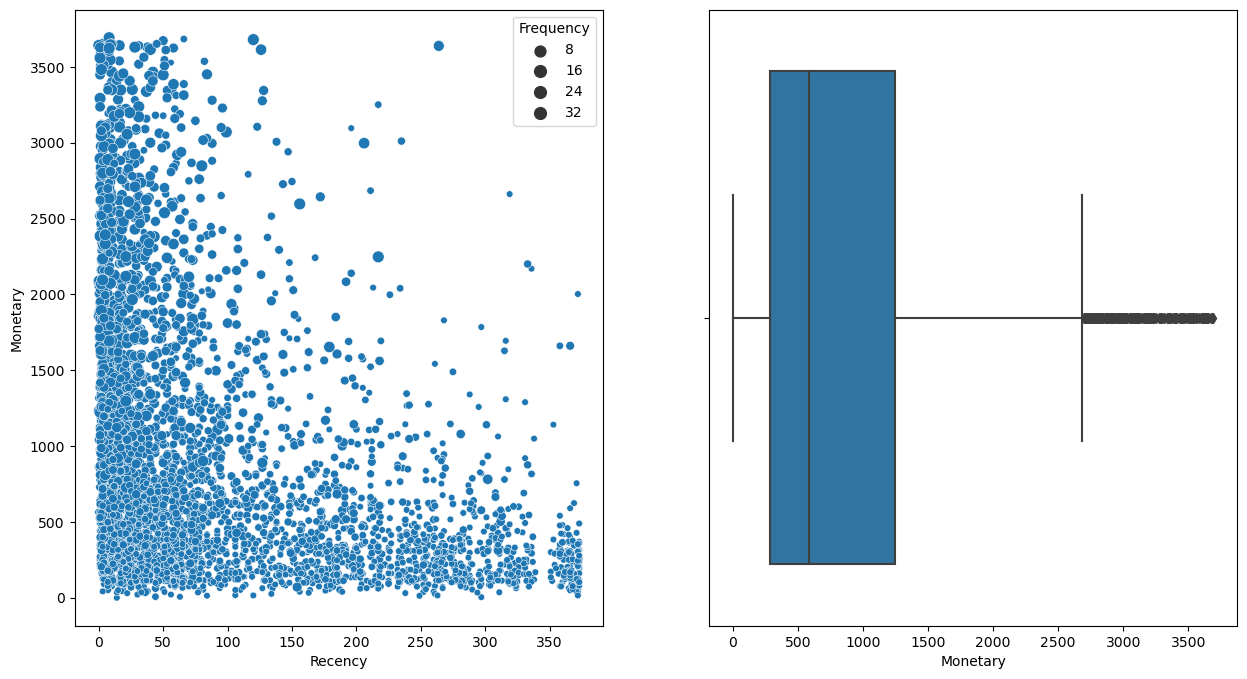

In [379]:
# plot the data after removing the outliers
fig, ax = plt.subplots(1,2,figsize = (15,8))
sns.scatterplot(data = clv_df, y = clv_df['Monetary'], x= clv_df['Recency'], ax= ax[0], size= 'Frequency', size_norm=(0,10))
sns.boxplot(data= clv_df, x = clv_df['Monetary'], ax= ax[1])
plt.show()

In [380]:
clv_df.corr()

,Recency,Frequency,Monetary,Spend90D,Buy90D
Recency,1.000000,-0.388639,-0.357869,-0.520301,-0.851709
Frequency,-0.388639,1.000000,0.715856,0.413416,0.331896
Monetary,-0.357869,0.715856,1.000000,0.659042,0.316689
Spend90D,-0.520301,0.413416,0.659042,1.000000,0.566182
Buy90D,-0.851709,0.331896,0.316689,0.566182,1.000000


We can see how the correlation value improved after dropping the outliers 

## 1) Regression Model
Before constructing the model, let's explore how the customer's spending in the recent 90 days correlates with the RFM factors to see the nature of the relationship between these variables and how in nature these variables affecting the amount spending by the customers.

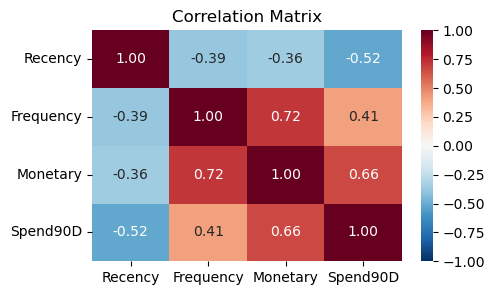

In [383]:
# correlation matrix
corr = clv_df[["Recency","Frequency","Monetary", 'Spend90D']].corr()
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot= True , fmt="0.2f", cmap= "RdBu_r", vmin=-1, vmax= 1, cbar= True)
plt.title('Correlation Matrix')
plt.show()

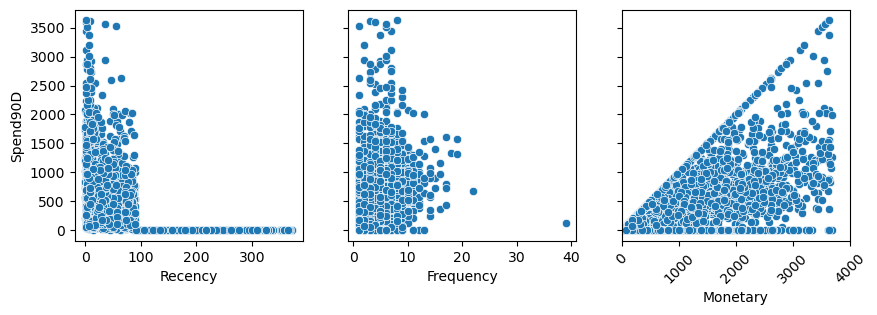

In [386]:
# Visualize the relationship
fig, ax = plt.subplots(1,3,figsize = (10,3), sharey= True)
sns.scatterplot(x = 'Recency', y ='Spend90D', data = clv_df, ax= ax[0])
sns.scatterplot(x = 'Frequency', y ='Spend90D', data = clv_df, ax= ax[1])
sns.scatterplot(x = 'Monetary', y ='Spend90D', data = clv_df, ax= ax[2])
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
plt.xlim(0,)
plt.show()

the correlation analysis reveals the following relationships between RFM factors and spending :

- Positive relationships exist between spending and both frequency and monetary factors. More frequent customers, who typically make larger purchases, tend to spend more for the. The strength of the relationship is moderate with frequency (0.41) and moderate to strong with monetary (0.66).
- Negative relationship with recency, the negative indicating that more recent customers tends to spend more, the strength of the relationship is moderate (-0.52).

These variables can be considered as good explanatory variables for the target variable, so can be used to predict how much the customer is going to spend in the next 90 days.  

- Also need to mention there is a collinearity between the variables 

In [559]:
# setting the variables
# selectting the predictor 
X = clv_df[["Recency","Frequency",'Monetary']]
# target variable
y = clv_df['Spend90D']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [560]:
# scale the data 
X = MinMaxScaler().fit_transform(X)

In [561]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 55)

I used the min-max method to scale the data due to its absence of a normal distribution pattern.and it will also make more since for this type of features  
I used a 10-fold cross-validation strategy instead of a traditional data split into training and testing sets

I will employ various regression models.
- The models I plan to use include:
  1. XGBoost regressor
  2. RandomForest
  3. Multiple linear regression
  4. Regression tree
  5. Polynomial regression
- After applying these models, I will assess their performance and select the one that yields the most favorable results for the analysis.

## Configure the models

#### XGBoost Regressor Model

In [447]:
# Importing the evaluation metric
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report,roc_auc_score,log_loss

In [392]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV
# setting up the xgboost Reg model
xgb_reg_model = XGBRegressor(objective= 'reg:squarederror', random_state = 55)
# Grid search parameter for tunning
param = {'learning_rate' : [0.01,0.1,0.3,0.5]}
# Grid search object
xgb_grid_search = GridSearchCV(estimator= xgb_reg_model, param_grid= param, cv= 10, 
                               scoring= 'neg_mean_squared_error', refit= True)

#### Random Forest Model

In [568]:
# setting up Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_reg_model = RandomForestRegressor(random_state= 33)
param = {
    'n_estimators': [10,50, 100, 150],
    'max_depth': [None, 10, 20, 30,50]
}  
rf_grid_search = GridSearchCV(estimator= rf_reg_model, param_grid= param, cv = 10, 
                              refit= True,scoring= 'neg_mean_squared_error')

#### Multiple Linear Regression

In [394]:
# setting up the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr_parm = {'fit_intercept': [True, False]}

mlr_grid = GridSearchCV(estimator=mlr, param_grid= mlr_parm, cv=10, 
                        scoring='neg_mean_squared_error', refit=True)

#### Polynomial Regression

In [427]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge # used to prevent the overfit due to the higher order of the parameter using polynomial
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(PolynomialFeatures(), Ridge() )

p_param = {
    'polynomialfeatures__degree':[2,3,4,5,6,7,8],
       'ridge__alpha': [0.1, 1, 10, 100] }

poly_grid_search = GridSearchCV(estimator= poly_reg, param_grid= p_param, cv= 10, scoring= 'r2')

#### Decision Tree Regressor

In [396]:
# setting up the model
from sklearn.tree import DecisionTreeRegressor
dt_reg_model = DecisionTreeRegressor(criterion= "squared_error", random_state=100)
dt_n = {'max_depth':[None,2,3,4,5,6,7,8,9,10,11,12,13,14,15,26,16,17,18]}

dt_reg_model_grid = GridSearchCV(estimator= dt_reg_model, param_grid= dt_n, cv = 10, 
                                  scoring= 'neg_mean_squared_error', refit= True)

## Models training and evaluation

#### XGB Model

In [562]:
xgb_grid_search.fit(X_train, y_train)
y_hat = xgb_grid_search.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test,y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_hat)))

R-squared:  0.7283444130368124 
Mean Absolute Error:  113.83465814949179 
Root Mean Squared Error:  227.4074868375444


In [578]:
xgb_grid_search.best_params_

{'learning_rate': 0.1}

#### RandomForest Model

In [569]:
rf_grid_search.fit(X_train, y_train)
y_hat = rf_grid_search.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.7500518570429713 
Mean Absolute Error:  105.99787785313455 
Root Mean Squared Error:  218.13250925133357


In [579]:
rf_grid_search.best_params_

{'max_depth': 10, 'n_estimators': 150}

#### Multiple Linear Regression Model

In [523]:
mlr_grid.fit(X_train, y_train)
y_hat = mlr_grid.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.520266166376824 
Mean Absolute Error:  209.6892009779337 
Root Mean Squared Error:  302.20080180242843


In [580]:
mlr_grid.best_params_

{'fit_intercept': True}

#### Polynomial Regression Model

In [524]:
poly_grid_search.fit(X_train, y_train)
y_hat = poly_grid_search.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.5904359814089084 
Mean Absolute Error:  148.86300326165102 
Root Mean Squared Error:  279.22630915851016


In [581]:
poly_grid_search.best_params_

{'polynomialfeatures__degree': 7, 'ridge__alpha': 0.1}

#### Regression Tree Model

In [525]:
dt_reg_model_grid.fit(X_train, y_train)
y_hat = dt_reg_model_grid.predict(X_test)

print("R-squared: ",r2_score(y_test,y_hat),\
      "\nMean Absolute Error: ", mean_absolute_error(y_test, y_hat),\
      "\nRoot Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_hat)))

R-squared:  0.7264944897215655 
Mean Absolute Error:  117.07921201687277 
Root Mean Squared Error:  228.18047414499316


In [582]:
dt_reg_model_grid.best_params_

{'max_depth': 6}

### Evaluation
* All models demonstrate comparable performance, however both polynomial and multiple linear regression yielding lower results.    
* RandomForest model outperforms others in predicting customer spending, achieving the highest R-squared value of 0.75. This implies the model can explain for 75% of the spending variation,  making it a reliable estimator.  
* On average, predictions deviate by $105 for the 90-day spending period.


#### Feature importances

In [454]:
best_reg_model = rf_grid_search.best_estimator_

In [432]:
factor_tbl = {
    'factor':["Recency","Frequency",'Monetary'],
    'feature_importances':best_reg_model.feature_importances_.tolist()
}
factor_tbl = pd.DataFrame(factor_tbl)
factor_tbl.sort_values('feature_importances', ascending= False, inplace= True, ignore_index=True)

factor_tbl

,factor,feature_importances
0,Monetary,0.539220
1,Recency,0.355582
2,Frequency,0.105198


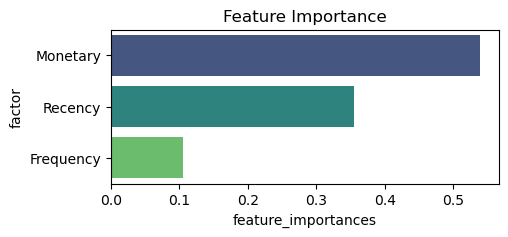

In [433]:
plt.figure(figsize=(5,2))
sns.barplot(x='feature_importances', y = 'factor', data = factor_tbl, palette= 'viridis')
plt.title('Feature Importance')
plt.show()

The primary factor influencing customer spending is monetary value. A higher monetary value indicates a likelihood of higher spending. Recency also plays a critical role, Frequency has the least impact on the total amount spent.

## 2) Classification Model
As my focus is on predicting the probability of a customer making a purchase in the next 90 days, I'll use the following models:
- XGBoost classifier
- Logistic regression

In [530]:
# Classification model variables
y = clv_df["Buy90D"] # only change the target variable
# need to change the y_train and y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 55)

Before devising any machine learning algorithm, let's first explore the simplest model: predicting the likelihood of a customer making a purchase in the next 90 days.

In [275]:
clv_df[clv_df['Buy90D'] == 1].shape[0]/clv_df.shape[0]

0.5383110531463972

approximately 54%, the estimated probability of a customer making a purchase in the next 90 days.

## Configure the models

#### XGBoost Classification Model

In [441]:
# XGBoost Classification Model setting
xgb_clas_model = XGBClassifier(objective= 'binary:logistic', random_state = 45)
clas_param = {
    'learning_rate': [0.01,0.1,0.3,0.5],
    'n_estimators' : [10,50,100]
    
}
xgb_class_grid_search = GridSearchCV(estimator= xgb_clas_model, param_grid= clas_param, cv = 10, scoring= 'roc_auc')

#### Logistic Regression

In [159]:
# Logistic Regression model configure
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_param = {
    'C': [0.001, 0.01, 0.1, 1, 10,],
    'solver' : ['lbfgs','liblinear','newton-cholesky']
}
log_grid_search = GridSearchCV(estimator= log_reg, param_grid= log_param, cv= 10, scoring= 'roc_auc')

## Models training and evaluation

#### XGBoost Classification Model

In [531]:
xgb_class_grid_search.fit(X_train,y_train)

y_hat = xgb_class_grid_search.predict(X_test)

y_pred = xgb_class_grid_search.predict_proba(X_test)

print('AUC Score:',roc_auc_score(y_test,y_hat),\
      "\nProb Loss: ",log_loss(y_test, y_pred),
     "\nReport: \n",classification_report(y_test, y_hat))

AUC Score: 0.9982578397212544 
Prob Loss:  0.33802171836814315 
Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       287
         1.0       1.00      1.00      1.00       496

    accuracy                           1.00       783
   macro avg       1.00      1.00      1.00       783
weighted avg       1.00      1.00      1.00       783



In [575]:
xgb_class_grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

#### Logistic Regression Model

In [537]:
log_grid_search.fit(X_train,y_train)

y_hat = log_grid_search.predict(X_test)

y_pred = log_grid_search.predict_proba(X_test)

print('AUC Score:',roc_auc_score(y_test,y_hat),\
      "\nProb Loss: ",log_loss(y_test, y_pred),
     "\nReport: \n",classification_report(y_test, y_hat))

AUC Score: 0.9790940766550523 
Prob Loss:  0.046371876823218146 
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       287
         1.0       0.98      1.00      0.99       496

    accuracy                           0.98       783
   macro avg       0.99      0.98      0.98       783
weighted avg       0.99      0.98      0.98       783



In [577]:
log_grid_search.best_params_

{'C': 10, 'solver': 'lbfgs'}

### Evaluation
- Both models have similar area under the curve (AUC) values and perform exceptional performance.
- Both model can classify weather the customer is going t buy or not
- Logistic Regression results in lower probability loss make it the best model
- Since both having same Log Loss values

so i will use with the Logistic model to make the predictions as it gives nearly perfect results 

#### Feature importances

In [538]:
best_class_model = log_grid_search.best_estimator_

In [545]:
class_factor_tbl = {
    'factor':["Recency","Frequency",'Monetary'],
    'feature_importances':best_class_model.coef_[0]
}
class_factor_tbl = pd.DataFrame(class_factor_tbl)
class_factor_tbl.sort_values('feature_importances', ascending= False, inplace= True, ignore_index=True)
class_factor_tbl

,factor,feature_importances
0,Monetary,0.948375
1,Frequency,-2.409591
2,Recency,-37.609368


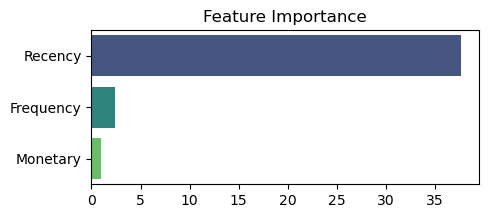

In [546]:
# making dictionary for the absolute value of the importance
class_factor_plot = {
    'factor':["Recency","Frequency",'Monetary'],
    'feature_importances':abs(best_class_model.coef_[0])
}
plt.figure(figsize=(5,2))
sns.barplot(x='feature_importances', y = 'factor', data = class_factor_plot, palette= 'viridis')
plt.title('Feature Importance')
plt.show()

* The primary factor influencing customers' decision to make a purchase is recency, which has the greatest impact, the direction of the impact is negative indicates the lower value of the recency gives higher probability.
* frequency also have a small impact with a negative direction mean if the customer more frequent is less likely to buy for the next 90 day
* monetary have the lowest impact 
* both factors frequency and monetary,have significant lower influence compared to recency.


## Using the models for business decisions

In [547]:
clv_df['SpendPred'] = best_reg_model.predict(X)  # x is the same for both model
clv_df['BuyProb'] = best_class_model.predict_proba(X)[:,1]

In [548]:
clv_df.sample(10)

,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
CustomerID,,,,,,,
12809,177,1,489.31,0.00,0.0,0.000000,2.534876e-04
17174,217,1,59.90,0.00,0.0,0.000000,4.023261e-06
14353,215,1,90.60,0.00,0.0,0.000000,4.961143e-06
14345,38,1,108.98,108.98,1.0,111.266076,9.964514e-01
17831,33,1,35.40,35.40,1.0,33.525078,9.978127e-01
12725,371,1,427.80,0.00,0.0,0.000000,7.980177e-13
17625,18,4,2047.00,812.22,1.0,1295.265214,9.996516e-01
13033,357,1,190.55,0.00,0.0,0.000000,3.080367e-12
15708,40,7,3364.24,663.81,1.0,829.186417,9.972452e-01


In [549]:
customer_data = clv_df.copy().reset_index()

## answers the model can provide 

1. Missed opportunities customers were supposed to spend money in last 90 days but didn't spend any money 
      - Reach these customer and encourage them to buy

In [571]:
customer_data[customer_data['Spend90D'] == 0].sort_values('SpendPred',ascending = False, ignore_index= True)\
[["Recency","Frequency","Monetary","CustomerID","Spend90D","SpendPred"]][:5]

,Recency,Frequency,Monetary,CustomerID,Spend90D,SpendPred
0,92,2,1579.12,13814,0.0,73.715841
1,91,7,1496.98,14414,0.0,29.072395
2,93,4,2106.52,18093,0.0,26.704298
3,14,1,0.00,13256,0.0,14.937451
4,92,3,1255.00,13848,0.0,5.515719


2. Customers having highest buying probability for the next 90 days
    - Target them with new products or similar product of their interest

In [572]:
customer_data[["CustomerID","SpendPred","BuyProb"]].sort_values('BuyProb', ascending = False, ignore_index= True)[:5]

,CustomerID,SpendPred,BuyProb
0,15484,3483.709131,0.999958
1,13536,2911.017206,0.999947
2,17528,2935.028277,0.999946
3,14251,2090.308143,0.999946
4,13426,1874.263031,0.999945


3. Customers supposed to making purchase but they didn't 
    - Contacting these customers promote offers 

In [573]:
customer_data[(customer_data['Recency'] > 90) &(customer_data['BuyProb'] > 0.5) ]\
.sort_values('BuyProb', ascending = False, ignore_index= True)[:5]

,CustomerID,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
0,13814,92,2,1579.12,0.0,0.0,73.715841,0.624119
1,14565,95,4,3099.12,0.0,0.0,0.000000,0.614952
2,13851,95,3,2651.46,0.0,0.0,0.000000,0.602670
3,18093,93,4,2106.52,0.0,0.0,26.704298,0.602258
4,12535,91,2,716.35,0.0,0.0,0.000000,0.595390


4. Customers recently make a purchase but unlikely to buy again
    - Provide discounts, target them with ads
    - Find what action can be taken to encourage  them to buy them to buy

In [574]:
customer_data[(customer_data['Recency'] < 90) &(customer_data['BuyProb']< 0.65)][:5]

,CustomerID,Recency,Frequency,Monetary,Spend90D,Buy90D,SpendPred,BuyProb
369,12924,88,4,933.70,278.43,1.0,259.284378,0.649715
655,13372,89,1,378.64,378.64,1.0,379.476158,0.637521
1390,14500,88,3,356.85,21.00,1.0,138.737389,0.630190
1738,15035,89,1,252.73,252.73,1.0,253.435009,0.630015
2151,15636,89,2,724.76,418.06,1.0,481.741758,0.643391


These data generated by the models can be saved and used 

saving the work

In [866]:
rfm.to_csv("rfm_data.csv", index= True)
clv_df[["Spend90D","Buy90D","SpendPred","BuyProb"]].to_csv("clv_data.csv", index= True)
df.to_csv("trans_data.csv", index= False)
cohort_revenue.to_csv('cohort_revenue.csv', index = True)
cohort_pivot.to_csv("cohort_month.csv", index = True)